
O módulo de classificação do PyCaret (`pycaret.classification`) é um módulo de aprendizado de máquina supervisionado que é usado para classificar os elementos em um grupo binário baseado em várias técnicas e algoritmos. Alguns casos de uso comuns de problemas de classificação incluem a previsão de inadimplência do cliente (sim ou não), rotatividade de clientes (o cliente sairá ou ficará), doença encontrada (positiva ou negativa).

O módulo de classificação PyCaret pode ser usado para problemas de classificação binária ou multiclasse. Possui mais de 18 algoritmos e 14 gráficos para analisar o desempenho dos modelos. Seja ajuste de hiperparâmetros, ensembling ou técnicas avançadas como empilhamento, o módulo de classificação do PyCaret tem tudo.

In [1]:
from pycaret.datasets import get_data

In [2]:
df = get_data('credit')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [3]:
data = df.sample(frac=0.95, random_state=42)
data_val = df.drop(data.index)
data.reset_index(inplace=True, drop=True)

data.shape[0], data_val.shape[0]

(22800, 1200)

In [4]:
from pycaret.classification import *

A função `setup()` inicializa o ambiente em pycaret e cria o pipeline de transformação para preparar os dados para modelagem e implantação. `setup()` deve ser chamado antes de executar qualquer outra função em pycaret. São necessários dois parâmetros obrigatórios: um dataframe de pandas e o nome da coluna de destino. Todos os outros parâmetros são opcionais e são usados para personalizar o pipeline de pré-processamento (veremos em tutoriais posteriores).

Quando `setup()` é executado, o algoritmo de inferência do PyCaret inferirá automaticamente os tipos de dados para todos os recursos com base em determinadas propriedades. O tipo de dados deve ser inferido corretamente, mas isso nem sempre é o caso. Para explicar isso, o PyCaret exibe uma tabela contendo os recursos e seus tipos de dados inferidos após a execução de `setup()`. Se todos os tipos de dados forem identificados corretamente, pode-se pressionar "enter" para continuar ou digitar "quit" para encerrar o experimento. Garantir que os tipos de dados estejam corretos é de fundamental importância no PyCaret, pois ele executa automaticamente algumas tarefas de pré-processamento que são imperativas para qualquer experimento de aprendizado de máquina. Essas tarefas são executadas de forma diferente para cada tipo de dados, o que significa que é muito importante que elas sejam configuradas corretamente.

Em tutoriais posteriores, aprenderemos como sobrescrever o tipo de dados inferido do PyCaret usando os parâmetros `numeric_features` e `categorical_features` em `setup()`.

In [5]:
exp_clf = setup(data=data, target='default', session_id=123)

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(22800, 24)"
4,Transformed data shape,"(22800, 24)"
5,Transformed train set shape,"(15959, 24)"
6,Transformed test set shape,"(6841, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


Comparar todos os modelos para avaliar o desempenho é o ponto de partida recomendado para a modelagem assim que a configuração estiver concluída (a menos que você saiba exatamente que tipo de modelo você precisa, o que geralmente não é o caso). Essa função treina todos os modelos na biblioteca de modelos e os pontua usando validação cruzada estratificada para avaliação de métricas. A saída imprime uma grade de pontuação que mostra a Precisão média, AUC, Recall, Precision, F1, Kappa e MCC (Matthews correlation coefficient) em folds (10 por padrão) junto com a quantidade de vezes de treinamento.

In [6]:
best_model = compare_models(fold=10)

Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [7]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


`create_model` é a função mais granular no PyCaret e geralmente é a base por trás da maioria das funcionalidades do PyCaret. Como o nome sugere, esta função treina e avalia um modelo usando validação cruzada que pode ser definida com o parâmetro `fold`. A saída imprime uma grade de pontuação que mostra Precisão, AUC, Recall, Precisão, F1, Kappa e MCC por dobra.

Para a parte restante deste tutorial, trabalharemos com os modelos abaixo como nossos modelos candidatos. As seleções são apenas para fins ilustrativos e não significam necessariamente que são as de melhor desempenho ou ideais para esse tipo de dados.

- Classificador de Árvore de Decisão ('dt') - decision tree
- Classificador K Neighbors ('knn')
- Classificador de Floresta Aleatória ('rf') - random forest

Existem 18 classificadores disponíveis na biblioteca de modelos do PyCaret. Para ver a lista de todos os classificadores, verifique a `docstring` ou use a função `models` para ver a lista de modelos.

In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [9]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7224,0.6120,0.4108,0.3816,0.3956,0.2158,0.2160
1,0.7206,0.6051,0.3983,0.3770,0.3874,0.2065,0.2067
2,0.7237,0.6234,0.4407,0.3910,0.4143,0.2344,0.2351
3,0.7325,0.6322,0.4520,0.4071,0.4284,0.2544,0.2550
4,0.7143,0.6033,0.4040,0.3686,0.3854,0.1998,0.2002
5,0.7406,0.6208,0.4068,0.4138,0.4103,0.2440,0.2440
6,0.7043,0.5959,0.4011,0.3532,0.3757,0.1829,0.1836
7,0.7043,0.5979,0.4068,0.3547,0.3789,0.1861,0.1868
8,0.7299,0.6155,0.4040,0.3939,0.3989,0.2248,0.2248


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7600,0.5994,0.1870,0.4074,0.2563,0.1361,0.1508
1,0.7437,0.5905,0.1638,0.3392,0.2210,0.0894,0.0979
2,0.7425,0.6172,0.2119,0.3623,0.2674,0.1240,0.1306
3,0.7481,0.5861,0.1723,0.3588,0.2328,0.1039,0.1139
4,0.7462,0.6125,0.1610,0.3455,0.2197,0.0915,0.1011
5,0.7581,0.6054,0.1808,0.4000,0.2490,0.1287,0.1432
6,0.7487,0.5974,0.1864,0.3687,0.2477,0.1159,0.1257
7,0.7481,0.6193,0.1667,0.3554,0.2269,0.0994,0.1096
8,0.7569,0.5881,0.1893,0.3988,0.2567,0.1329,0.1461


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8177,0.7519,0.3824,0.6490,0.4813,0.3795,0.3991
1,0.8114,0.7819,0.3446,0.6387,0.4477,0.3460,0.3700
2,0.8177,0.7772,0.3870,0.6493,0.4850,0.3827,0.4016
3,0.8120,0.7610,0.3785,0.6262,0.4718,0.3658,0.3830
4,0.8127,0.7494,0.3757,0.6303,0.4708,0.3657,0.3838
5,0.8189,0.7682,0.3503,0.6776,0.4618,0.3660,0.3948
6,0.8026,0.7378,0.3277,0.6010,0.4241,0.3173,0.3386
7,0.8064,0.7526,0.3136,0.6271,0.4181,0.3171,0.3446
8,0.8208,0.7647,0.3898,0.6635,0.4911,0.3911,0.4115


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
tunned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Quando um modelo é criado usando a função `create_model()`, ele usa os hiperparâmetros padrão para treinar o modelo. Para ajustar os hiperparâmetros, a função `tune_model()` é usada. Esta função ajusta automaticamente os hiperparâmetros de um modelo usando `Random Grid Search` em um espaço de busca pré-definido. A saída imprime uma grade de pontuação que mostra Precisão, AUC, Recall, Precisão, F1, Kappa e MCC por dobra para o melhor modelo. Para usar a grade de pesquisa personalizada, você pode passar o parâmetro `custom_grid` na função `tune_model` (veja 9.2 Ajuste de KNN abaixo). <br/>
<br/>

In [13]:
print(tunned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')


In [14]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [15]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=38, p=2,
                     weights='uniform')


In [16]:
tuned_rf = tune_model(rf, optimize='F1')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Antes da finalização do modelo, a função `plot_model()` pode ser usada para analisar o desempenho em diferentes aspectos, como AUC, Matriz de confusão, limite de decisão, etc. Essa função pega um objeto de modelo treinado e retorna um gráfico com base no conjunto de teste/hold-out.

Existem 15 gráficos diferentes disponíveis, por favor veja a docstring `plot_model()` para a lista de gráficos disponíveis.

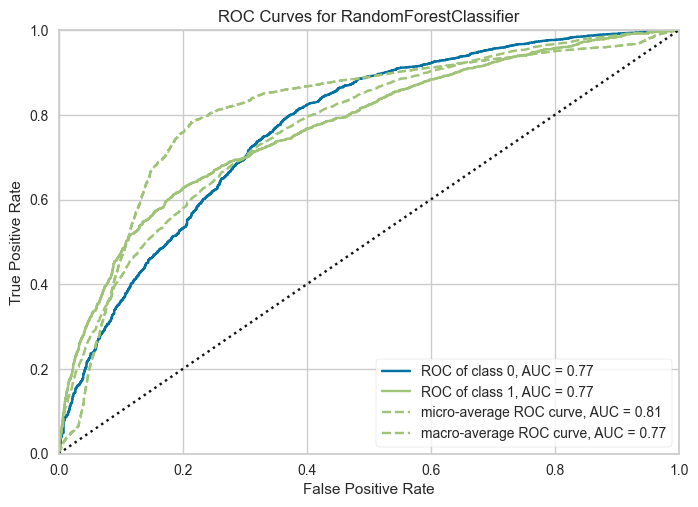

In [17]:
plot_model(tuned_rf, plot='auc')

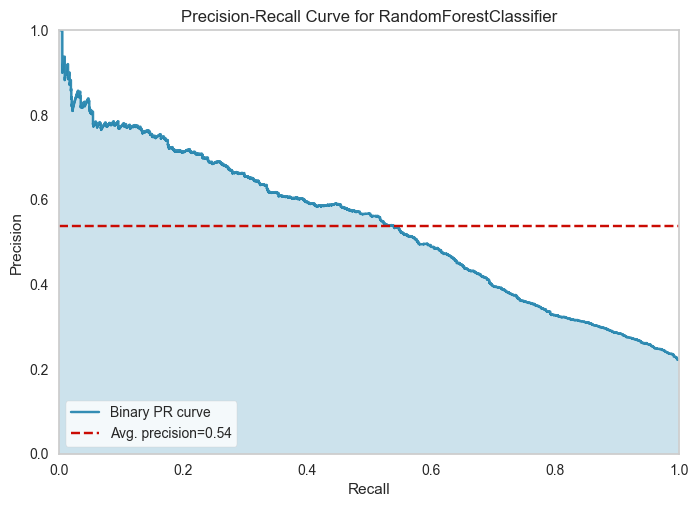

In [18]:
plot_model(tuned_rf, plot='pr')

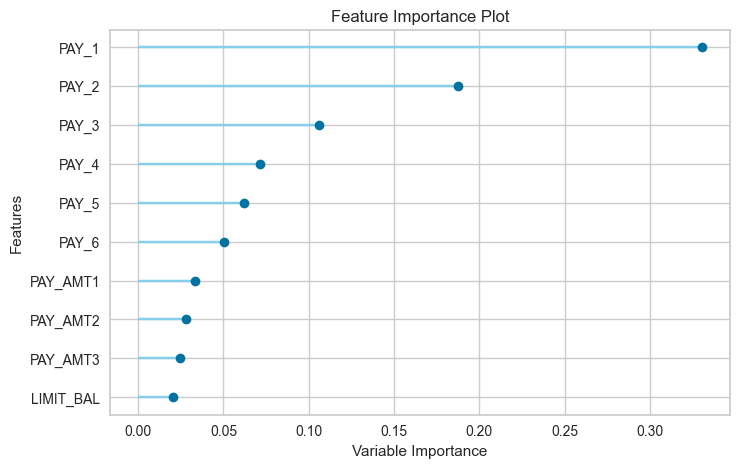

In [19]:
plot_model(tuned_rf, plot='feature')

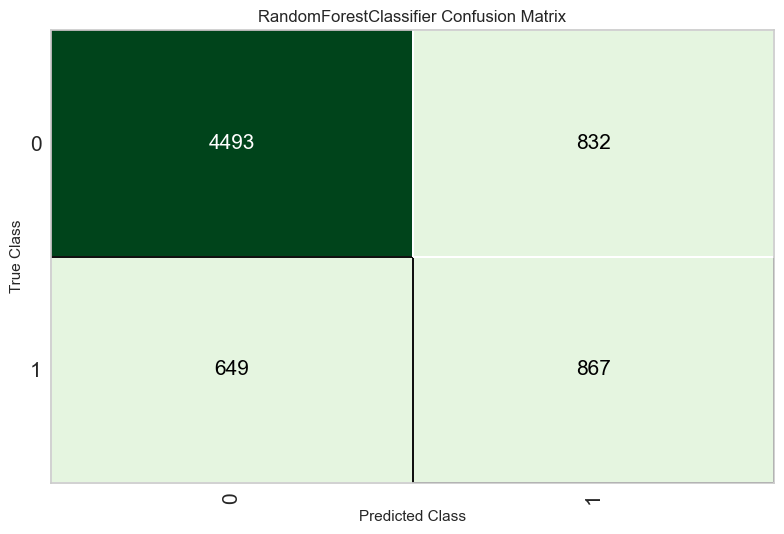

In [20]:
plot_model(tuned_rf, plot='confusion_matrix')

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

In [21]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Antes de finalizar o modelo, é aconselhável realizar uma verificação final prevendo o conjunto de teste/hold-out e revisando as métricas de avaliação. Se você observar a grade de informações na Seção 6 acima, verá que 30% (6.841 amostras) dos dados foram separados como amostra de teste/resistência. Todas as métricas de avaliação que vimos acima são resultados de validação cruzada com base apenas no conjunto de treinamento (70%). Agora, usando nosso modelo final treinado armazenado na variável `tuned_rf`, faremos previsões em relação à amostra de retenção e avaliaremos as métricas para ver se elas são materialmente diferentes dos resultados do CV.

In [22]:
predict_model(tuned_rf)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
16249,50000,1,1,1,45,-1,-1,-1,-1,-1,...,390.0,390.0,390.0,390.0,390.0,390.0,390.0,1,0,0.5245
15122,50000,1,3,1,42,0,0,0,0,0,...,18721.0,2000.0,1293.0,644.0,666.0,676.0,681.0,0,0,0.5763
4452,80000,2,2,1,36,0,0,0,0,0,...,78434.0,3700.0,3500.0,4000.0,3200.0,4000.0,2700.0,0,0,0.6779
9173,150000,2,2,3,48,0,0,0,0,0,...,0.0,2000.0,1523.0,2000.0,0.0,0.0,0.0,0,0,0.6038
1577,220000,1,1,1,47,0,0,0,0,0,...,60982.0,3209.0,2913.0,2435.0,2300.0,2378.0,2266.0,0,0,0.6859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10325,460000,1,1,1,44,-1,-1,-1,-1,-1,...,75942.0,51383.0,103142.0,68541.0,28269.0,76056.0,52143.0,0,0,0.7560
4383,50000,2,2,2,31,1,-2,-1,-1,-1,...,32851.0,0.0,190.0,0.0,36059.0,0.0,2420.0,0,1,0.5408
4648,70000,2,2,1,40,1,2,2,0,0,...,26342.0,5500.0,0.0,2723.0,1062.0,936.0,943.0,1,1,0.7179
3076,240000,2,3,1,41,-1,-1,-1,0,-1,...,10942.0,3724.0,7448.0,0.0,5814.0,8852.0,0.0,0,0,0.6576


A finalização do modelo é a última etapa do experimento. Um fluxo de trabalho normal de aprendizado de máquina no PyCaret começa com `setup()`, seguido pela comparação de todos os modelos usando `compare_models()` e listando alguns modelos candidatos (com base na métrica de interesse) para executar várias técnicas de modelagem, como ajuste de hiperparâmetros, ensembling, empilhamento, etc. Esse fluxo de trabalho acabará por levá-lo ao melhor modelo para uso em fazer previsões sobre dados novos e não vistos. A função `finalize_model()` ajusta o modelo ao conjunto de dados completo, incluindo a amostra de teste/hold-out (30% neste caso). O objetivo dessa função é treinar o modelo no conjunto de dados completo antes de ser implantado na produção.

In [23]:
final_rf = finalize_model(tuned_rf)

In [24]:
print(final_rf)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                             'PAY_AMT4', 'PAY_AMT5',
                                             'PAY_AMT6'],
                                    transform...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced_subsample',
                

In [25]:
predict_model(final_rf)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
16249,50000,1,1,1,45,-1,-1,-1,-1,-1,...,390.0,390.0,390.0,390.0,390.0,390.0,390.0,1,0,0.5281
15122,50000,1,3,1,42,0,0,0,0,0,...,18721.0,2000.0,1293.0,644.0,666.0,676.0,681.0,0,0,0.5870
4452,80000,2,2,1,36,0,0,0,0,0,...,78434.0,3700.0,3500.0,4000.0,3200.0,4000.0,2700.0,0,0,0.6726
9173,150000,2,2,3,48,0,0,0,0,0,...,0.0,2000.0,1523.0,2000.0,0.0,0.0,0.0,0,0,0.6080
1577,220000,1,1,1,47,0,0,0,0,0,...,60982.0,3209.0,2913.0,2435.0,2300.0,2378.0,2266.0,0,0,0.6940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10325,460000,1,1,1,44,-1,-1,-1,-1,-1,...,75942.0,51383.0,103142.0,68541.0,28269.0,76056.0,52143.0,0,0,0.7435
4383,50000,2,2,2,31,1,-2,-1,-1,-1,...,32851.0,0.0,190.0,0.0,36059.0,0.0,2420.0,0,1,0.5223
4648,70000,2,2,1,40,1,2,2,0,0,...,26342.0,5500.0,0.0,2723.0,1062.0,936.0,943.0,1,1,0.7222
3076,240000,2,3,1,41,-1,-1,-1,0,-1,...,10942.0,3724.0,7448.0,0.0,5814.0,8852.0,0.0,0,0,0.6479


In [26]:
data_val_pred = predict_model(final_rf, data=data_val)
data_val_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7750,0.7594,0.5635,0.4702,0.5126,0.3679,0.3705


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
9,260000,2,1,2,51,-1,-1,-1,-1,-1,...,13668.0,21818.0,9966.0,8583.0,22301.0,0.0,3640.0,0,0,0.6623
55,80000,1,1,2,31,-1,-1,-1,-1,-1,...,390.0,0.0,390.0,390.0,390.0,390.0,390.0,0,0,0.5195
77,90000,1,2,2,35,0,0,0,0,0,...,30835.0,3621.0,3597.0,1179.0,1112.0,1104.0,1143.0,0,0,0.6260
117,80000,2,2,1,23,1,2,3,2,0,...,12034.0,1650.0,0.0,0.0,379.0,2091.0,1.0,0,1,0.7537
126,30000,1,1,2,41,2,2,2,2,2,...,28321.0,3500.0,0.0,2200.0,0.0,1200.0,1250.0,0,1,0.8624


As colunas `Label` e `Score` são adicionadas ao conjunto `data_unseen`. Rótulo é a previsão e pontuação é a probabilidade da previsão. Observe que os resultados previstos são concatenados ao conjunto de dados original enquanto todas as transformações são executadas automaticamente em segundo plano. Você também pode verificar as métricas sobre isso, pois tem a coluna de destino real `default` disponível. Para fazer isso, usaremos o módulo `pycaret.utils`. Veja exemplo abaixo:

In [27]:
from pycaret.utils.generic import check_metric
check_metric(data_val_pred['default'], data_val_pred['prediction_label'], metric = 'Accuracy')

0.775

Agora terminamos o experimento finalizando o modelo `tuned_rf` que agora está armazenado na variável `final_rf`. Também usamos o modelo armazenado em `final_rf` para prever `data_unseen`. Isso nos leva ao final de nosso experimento, mas uma pergunta ainda deve ser feita: o que acontece quando você tem mais dados novos para predizer? Você tem que passar por todo o experimento novamente? A resposta é não, a função interna do PyCaret `save_model()` permite que você salve o modelo junto com todo o pipeline de transformação para uso posterior.

In [28]:
save_model(final_rf, 'Final RF Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                              'MARRIAGE', 'AGE', 'PAY_1',
                                              'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                              'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                              'BILL_AMT3', 'BILL_AMT4',
                                              'BILL_AMT5', 'BILL_AMT6',
                                              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                              'PAY_AMT4', 'PAY_AMT5',
                                              'PAY_AMT6'],
                                     transform...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
 

Para carregar um modelo salvo em uma data futura no mesmo ambiente ou em um ambiente alternativo, usaríamos a função `load_model()` do PyCaret e, em seguida, aplicaríamos facilmente o modelo salvo em novos dados não vistos para previsão.

In [29]:
sav_final_rf = load_model('Final RF Model')

Transformation Pipeline and Model Successfully Loaded


In [30]:
new_pred = predict_model(sav_final_rf, data=data_val)

Pycaret na base de dados do projeto

In [31]:
import pandas as pd

In [33]:
df = pd.read_feather('credit_scoring.ftr')
df.shape

(750000, 15)

In [ ]:
df.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'mau'],
      dtype='object')

In [34]:
data = df.sample(20000)
data.drop(['data_ref', 'index'], axis=1, inplace=True)

In [37]:
data_treino = data.sample(frac=0.95, random_state=42)
data_val = data.drop(data_treino.index)
data.reset_index(inplace=True, drop=True)

data_treino.shape

(19000, 13)

In [38]:
from pycaret.classification import *

In [39]:
exp_clf = setup(data=data_treino, target='mau', session_id=123)

,Description,Value
0,Session id,123
1,Target,mau
2,Target type,Binary
3,Original data shape,"(19000, 13)"
4,Transformed data shape,"(19000, 30)"
5,Transformed train set shape,"(13300, 30)"
6,Transformed test set shape,"(5700, 30)"
7,Numeric features,5
8,Categorical features,7
9,Rows with missing values,17.2%


Verificando se o pycaret selecionou os tipos de dados corretamente.

In [40]:
df_teste = get_config('data')

print(df_teste.dtypes)

sexo                     category
posse_de_veiculo         category
posse_de_imovel          category
qtd_filhos                   int8
tipo_renda               category
educacao                 category
estado_civil             category
tipo_residencia          category
idade                        int8
tempo_emprego             float32
qt_pessoas_residencia     float32
renda                     float32
mau                          bool
dtype: object


In [41]:
# Comparando com os adados originais:

data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
mau                         bool
dtype: object

Caso haja algum erro, transformações no df original e uma nova configuração de setup são necessárias.

In [42]:
best_model = compare_models(fold=10)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:10:57
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
best_model = compare_models(fold=10, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.8829,0.7766,0.2167,0.1906,0.1879,0.1420,0.1488,0.0590
gbc,Gradient Boosting Classifier,0.9165,0.7699,0.0193,0.2810,0.0357,0.0268,0.0542,0.2800
lr,Logistic Regression,0.9183,0.7686,0.0000,0.0000,0.0000,0.0000,0.0000,0.4100
ada,Ada Boost Classifier,0.9178,0.7686,0.0239,0.3972,0.0446,0.0367,0.0801,0.1370
qda,Quadratic Discriminant Analysis,0.1459,0.6732,0.9890,0.0865,0.1590,0.0104,0.0663,0.0480
ridge,Ridge Classifier,0.9183,0.6353,0.0000,0.0000,0.0000,0.0000,0.0000,0.0520
lda,Linear Discriminant Analysis,0.9180,0.6351,0.0000,0.0000,0.0000,-0.0006,-0.0023,0.0510
knn,K Neighbors Classifier,0.9081,0.0000,0.0700,0.2622,0.1098,0.0785,0.0981,0.0880
nb,Naive Bayes,0.4889,0.0000,0.8710,0.1245,0.2178,0.0874,0.1805,0.0490
dt,Decision Tree Classifier,0.8611,0.0000,0.1943,0.1773,0.1848,0.1093,0.1096,0.0600


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [43]:
gbc = create_model('gbc')

tuned_gbc = tune_model(gbc, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9158,0.7691,0.0093,0.1667,0.0175,0.0091,0.0211
1,0.9150,0.7232,0.0093,0.1429,0.0174,0.0076,0.0164
2,0.9173,0.7859,0.0093,0.2500,0.0179,0.0121,0.0339
3,0.9195,0.7733,0.0556,0.5455,0.1008,0.0871,0.1552
4,0.9150,0.7763,0.0183,0.2500,0.0342,0.0232,0.0477
5,0.9180,0.7938,0.0092,0.5000,0.0180,0.0151,0.0591
6,0.9173,0.7711,0.0459,0.4545,0.0833,0.0694,0.1240
7,0.9165,0.7632,0.0000,0.0000,0.0000,-0.0030,-0.0116
8,0.9158,0.7605,0.0275,0.3333,0.0508,0.0388,0.0756


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9188,0.7743,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9188,0.7297,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9188,0.7759,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9188,0.7735,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9180,0.7876,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9180,0.7773,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9180,0.7709,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9180,0.7595,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9180,0.7608,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


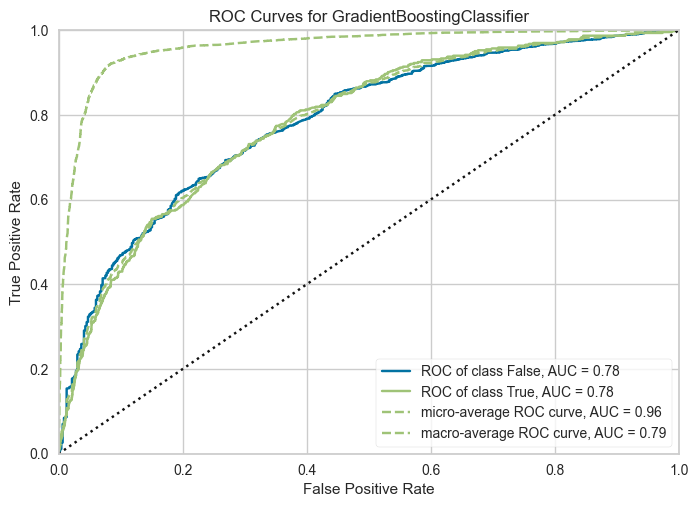

In [ ]:
plot_model(tuned_gbc, plot='auc')

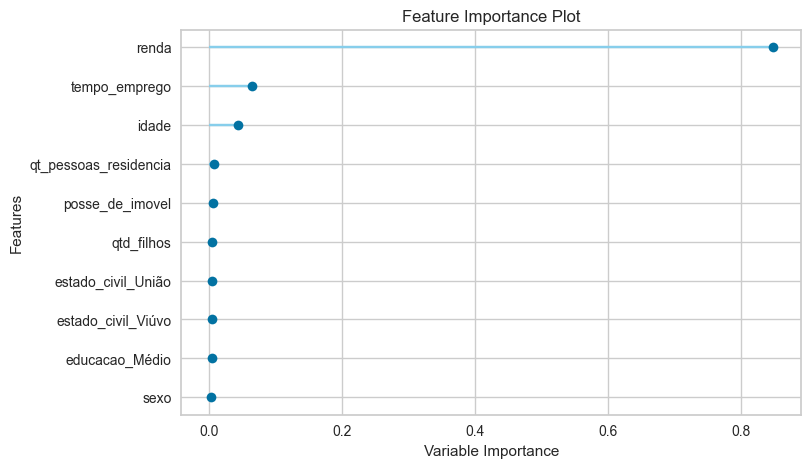

In [ ]:
plot_model(tuned_gbc, plot='feature')

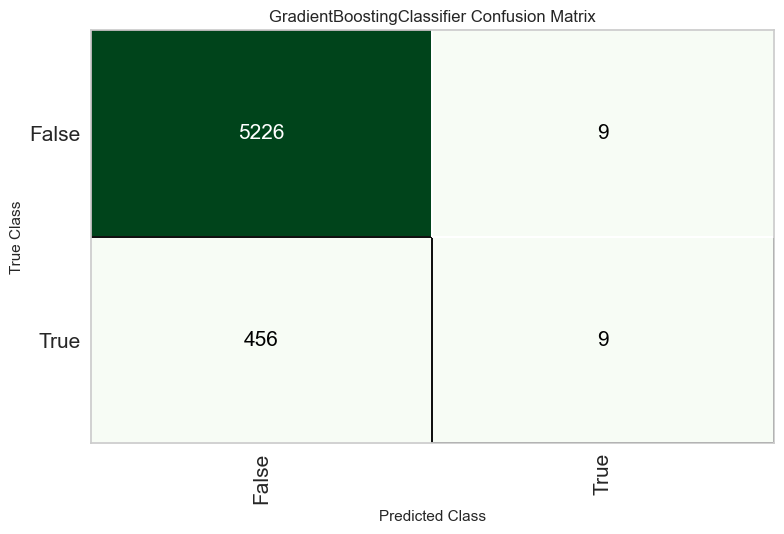

In [ ]:
plot_model(tuned_gbc, plot='confusion_matrix')

In [ ]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9184,0.7849,0.0194,0.5000,0.0373,0.0314,0.0860


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,prediction_label,prediction_score
254302,F,S,S,0,Empresário,Médio,Casado,Casa,50,16.476713,2.0,128665.210938,False,0,0.9931
440130,F,N,S,0,Pensionista,Médio,Viúvo,Casa,54,NaN,1.0,23666.169922,False,0,0.9804
55085,F,N,S,0,Assalariado,Médio,Casado,Casa,59,23.202740,2.0,33548.019531,False,0,0.9815
255039,M,S,N,1,Empresário,Médio,Casado,Casa,25,3.849315,3.0,16450.800781,False,0,0.9763
200491,M,S,S,2,Assalariado,Médio,Casado,Com os pais,35,11.112329,4.0,11099.650391,False,0,0.9650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672819,M,S,S,0,Assalariado,Médio,Casado,Com os pais,44,8.523288,2.0,4344.520020,False,0,0.9121
744726,F,S,N,0,Assalariado,Superior completo,Casado,Comunitário,35,6.263014,2.0,2873.590088,False,0,0.8958
264589,F,N,S,0,Pensionista,Médio,Casado,Casa,63,NaN,2.0,22091.419922,False,0,0.9713
51388,F,N,N,1,Empresário,Médio,Solteiro,Casa,38,2.698630,2.0,3256.030029,False,0,0.8877


In [44]:
final_gbc = finalize_model(tuned_gbc)

In [ ]:
print(final_gbc)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['qtd_filhos', 'idade',
                                             'tempo_emprego',
                                             'qt_pessoas_residencia', 'renda'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWra...
                                            criterion='friedman_mse', init=None,
                   

In [ ]:
predict_model(final_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9228,0.8247,0.0645,0.8571,0.1200,0.1098,0.2227


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,prediction_label,prediction_score
254302,F,S,S,0,Empresário,Médio,Casado,Casa,50,16.476713,2.0,128665.210938,False,0,0.9920
440130,F,N,S,0,Pensionista,Médio,Viúvo,Casa,54,NaN,1.0,23666.169922,False,0,0.9821
55085,F,N,S,0,Assalariado,Médio,Casado,Casa,59,23.202740,2.0,33548.019531,False,0,0.9842
255039,M,S,N,1,Empresário,Médio,Casado,Casa,25,3.849315,3.0,16450.800781,False,0,0.9737
200491,M,S,S,2,Assalariado,Médio,Casado,Com os pais,35,11.112329,4.0,11099.650391,False,0,0.9666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672819,M,S,S,0,Assalariado,Médio,Casado,Com os pais,44,8.523288,2.0,4344.520020,False,0,0.9103
744726,F,S,N,0,Assalariado,Superior completo,Casado,Comunitário,35,6.263014,2.0,2873.590088,False,0,0.9148
264589,F,N,S,0,Pensionista,Médio,Casado,Casa,63,NaN,2.0,22091.419922,False,0,0.9786
51388,F,N,N,1,Empresário,Médio,Solteiro,Casa,38,2.698630,2.0,3256.030029,False,0,0.9034


In [ ]:
evaluate_model(final_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
data_val_pred = predict_model(final_gbc, data=data_val)
data_val_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9110,0.7887,0.0114,0.3333,0.0220,0.0163,0.0475


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,prediction_label,prediction_score
519497,M,S,N,0,Assalariado,Superior completo,Casado,Casa,36,6.769863,2.0,11555.320312,False,0,0.9664
399562,M,S,S,0,Assalariado,Superior completo,Casado,Casa,49,9.610959,2.0,22259.820312,False,0,0.9866
137907,M,S,N,0,Assalariado,Médio,Separado,Governamental,39,0.868493,1.0,1956.660034,False,0,0.7350
111174,F,N,S,1,Assalariado,Superior completo,Casado,Casa,28,6.515069,3.0,4374.100098,False,0,0.9082
536400,F,N,S,0,Servidor público,Médio,Viúvo,Casa,54,16.068493,1.0,10176.559570,False,0,0.9658


In [45]:
save_model(final_gbc, 'Final_gbc')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWra...
                                             criterion='friedman_mse', init=None,
    

In [46]:
model = load_model('Final_gbc')

Transformation Pipeline and Model Successfully Loaded


### Pipeline

In [47]:
type(model)

pycaret.internal.pipeline.Pipeline

In [48]:
model.named_steps

{'numerical_imputer': TransformerWrapper(exclude=None,
                    include=['qtd_filhos', 'idade', 'tempo_emprego',
                             'qt_pessoas_residencia', 'renda'],
                    transformer=SimpleImputer(add_indicator=False, copy=True,
                                              fill_value=None,
                                              keep_empty_features=False,
                                              missing_values=nan,
                                              strategy='mean')),
 'categorical_imputer': TransformerWrapper(exclude=None,
                    include=['sexo', 'posse_de_veiculo', 'posse_de_imovel',
                             'tipo_renda', 'educacao', 'estado_civil',
                             'tipo_residencia'],
                    transformer=SimpleImputer(add_indicator=False, copy=True,
                                              fill_value=None,
                                              keep_empty_features=False,


In [49]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [50]:
X_digits, y_digits = load_digits(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)


pca = PCA(n_components=20)

scaler = StandardScaler()

logistic = LogisticRegression(max_iter=200)

In [51]:
X_digits.shape

(1797, 64)

In [52]:
# Dataset de treino:

scaler.fit(X_train)
X_train = scaler.transform(X_train)

pca.fit(X_train)
X_train = pca.transform(X_train)

logistic.fit(X_train, y_train)
logistic.predict(X_train)

array([0, 0, 0, ..., 2, 1, 2])

In [56]:
#Dataset de teste:

X_teste = scaler.transform(X_test)
X_teste = pca.transform(X_test)

logistic.predict(X_teste)


array([5, 2, 5, 1, 1, 2, 6, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 1, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 6, 1, 9, 2, 5, 6, 2, 1, 0, 1,
       2, 3, 6, 1, 9, 6, 6, 9, 8, 6, 8, 5, 1, 7, 1, 0, 1, 9, 8, 6, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 1, 8, 0, 1, 1, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 6, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 1, 1, 6, 0, 8, 8, 1, 1, 7, 9, 9, 5, 2, 3, 3, 1, 7, 6,
       2, 5, 1, 3, 8, 9, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 1, 1, 1, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 6, 1, 5, 6, 9, 3, 5, 6, 6, 0, 8, 6, 7, 0,
       9, 9, 1, 7, 9, 9, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 9, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 1, 1, 8, 2, 9, 1, 5,
       6, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       6, 1, 9, 1, 5, 6, 1, 1, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 7, 1, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 9, 1, 6, 2, 2, 0, 8, 6, 7, 3, 3,

### Usando o pipeline:

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)


pca = PCA(n_components=15)

scaler = StandardScaler()

logistic = LogisticRegression(max_iter=200)

In [60]:
pipe = Pipeline(steps=[('scaler', scaler),
               ('pca', pca),
               ('reg_log', logistic)])

In [61]:
pipe.named_steps

{'sacler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'pca': PCA(copy=True, iterated_power='auto', n_components=20, n_oversamples=10,
     power_iteration_normalizer='auto', random_state=None, svd_solver='auto',
     tol=0.0, whiten=False),
 'reg_log': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=200,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)}

In [62]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('sacler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=20,
                     n_oversamples=10, power_iteration_normalizer='auto',
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg_log',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=200,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [63]:
pipe.predict(X_train)

array([0, 0, 0, ..., 2, 1, 2])

In [68]:
# Dados de teste

pipe.predict(X_teste)

array([3, 3, 0, 7, 3, 1, 6, 1, 1, 8, 5, 2, 8, 5, 4, 9, 3, 5, 8, 2, 7, 8,
       9, 2, 4, 6, 0, 3, 8, 6, 0, 1, 2, 1, 7, 6, 6, 3, 9, 9, 1, 4, 8, 6,
       3, 1, 5, 7, 5, 6, 4, 6, 3, 7, 3, 1, 5, 9, 3, 5, 4, 1, 7, 4, 2, 5,
       8, 2, 5, 1, 5, 1, 4, 4, 9, 2, 1, 8, 9, 1, 8, 4, 4, 0, 7, 3, 1, 3,
       5, 4, 1, 9, 1, 6, 2, 5, 3, 3, 6, 3, 0, 0, 5, 9, 7, 3, 5, 8, 9, 2,
       4, 1, 3, 3, 4, 7, 5, 9, 3, 3, 4, 6, 2, 3, 6, 5, 1, 4, 4, 3, 2, 8,
       1, 9, 7, 8, 3, 0, 5, 2, 1, 2, 6, 5, 4, 7, 6, 6, 3, 7, 5, 7, 7, 9,
       5, 8, 5, 1, 1, 9, 4, 1, 4, 4, 0, 7, 6, 8, 3, 9, 7, 0, 8, 3, 9, 2,
       8, 5, 4, 0, 4, 0, 1, 4, 9, 2, 0, 1, 3, 2, 7, 1, 3, 3, 9, 1, 4, 9,
       3, 4, 4, 2, 3, 8, 2, 5, 6, 9, 8, 1, 9, 3, 8, 4, 4, 5, 9, 8, 0, 3,
       0, 1, 1, 5, 4, 1, 0, 3, 7, 4, 0, 4, 9, 4, 8, 4, 4, 4, 0, 8, 5, 5,
       6, 4, 6, 7, 0, 8, 4, 5, 9, 8, 3, 9, 1, 9, 7, 1, 1, 9, 6, 4, 4, 0,
       2, 4, 2, 1, 8, 3, 8, 6, 3, 8, 8, 1, 7, 8, 8, 8, 9, 0, 4, 7, 4, 2,
       9, 8, 7, 8, 2, 3, 8, 8, 8, 0, 8, 6, 9, 1, 1,

In [69]:
pipe[0]

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
pipe[2]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Alterações no Setup:

In [71]:
df = pd.read_feather('credit_scoring.ftr')

data = df.sample(20000)
data.drop(['data_ref', 'index'], axis=1, inplace=True)

data_treino = data.sample(frac=0.95, random_state=42)
data_val = data.drop(data_treino.index)
data.reset_index(inplace=True, drop=True)

In [74]:
data['mau'].value_counts('normalize')

mau
False    0.91855
True     0.08145
Name: proportion, dtype: float64

In [75]:
data.select_dtypes('number').corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.358044,-0.080416,0.893749,-0.046695
idade,-0.358044,1.000000,0.329107,-0.331153,0.111896
tempo_emprego,-0.080416,0.329107,1.000000,-0.075248,0.549789
qt_pessoas_residencia,0.893749,-0.331153,-0.075248,1.000000,-0.054023
renda,-0.046695,0.111896,0.549789,-0.054023,1.000000


In [76]:
clf = setup(data=data, target='mau', experiment_name='credit_1',
            normalize=True, normalize_method='zscore',
            transformation=True, transformation_method='quantile',
            fix_imbalance=True)

,Description,Value
0,Session id,7396
1,Target,mau
2,Target type,Binary
3,Original data shape,"(20000, 13)"
4,Transformed data shape,"(31720, 30)"
5,Transformed train set shape,"(25720, 30)"
6,Transformed test set shape,"(6000, 30)"
7,Numeric features,5
8,Categorical features,7
9,Rows with missing values,17.0%


In [80]:
get_config('data').dtypes

sexo                     category
posse_de_veiculo         category
posse_de_imovel          category
qtd_filhos                   int8
tipo_renda               category
educacao                 category
estado_civil             category
tipo_residencia          category
idade                        int8
tempo_emprego             float32
qt_pessoas_residencia     float32
renda                     float32
mau                          bool
dtype: object

In [81]:
model = create_model('lr')

tuned_lr = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9007,0.7578,0.1754,0.3077,0.2235,0.1747,0.1826
1,0.8929,0.7544,0.2105,0.2857,0.2424,0.1862,0.1887
2,0.8836,0.7561,0.2105,0.2474,0.2275,0.1650,0.1656
3,0.9000,0.7910,0.2281,0.3333,0.2708,0.2192,0.2237
4,0.8986,0.7797,0.2544,0.3372,0.2900,0.2365,0.2393
5,0.9029,0.7786,0.2807,0.3721,0.3200,0.2688,0.2719
6,0.8907,0.7265,0.2018,0.2706,0.2312,0.1737,0.1758
7,0.8943,0.7454,0.2895,0.3300,0.3084,0.2514,0.2521
8,0.8914,0.7311,0.2895,0.3173,0.3028,0.2440,0.2443


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9064,0.7583,0.1316,0.3191,0.1863,0.1457,0.1620
1,0.9050,0.7556,0.2018,0.3538,0.2570,0.2103,0.2198
2,0.8907,0.7497,0.1404,0.2254,0.1730,0.1178,0.1216
3,0.9100,0.7916,0.1930,0.3929,0.2588,0.2168,0.2324
4,0.9143,0.7886,0.2193,0.4464,0.2941,0.2541,0.2724
5,0.9086,0.7803,0.2018,0.3833,0.2644,0.2206,0.2336
6,0.8936,0.7302,0.1491,0.2464,0.1858,0.1325,0.1373
7,0.8957,0.7513,0.1930,0.2895,0.2316,0.1780,0.1823
8,0.9043,0.7348,0.2456,0.3684,0.2947,0.2456,0.2514


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [83]:
save_model(model, 'LR model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWra...
                  TransformerWrapper(exclude=None, include=None,
                     

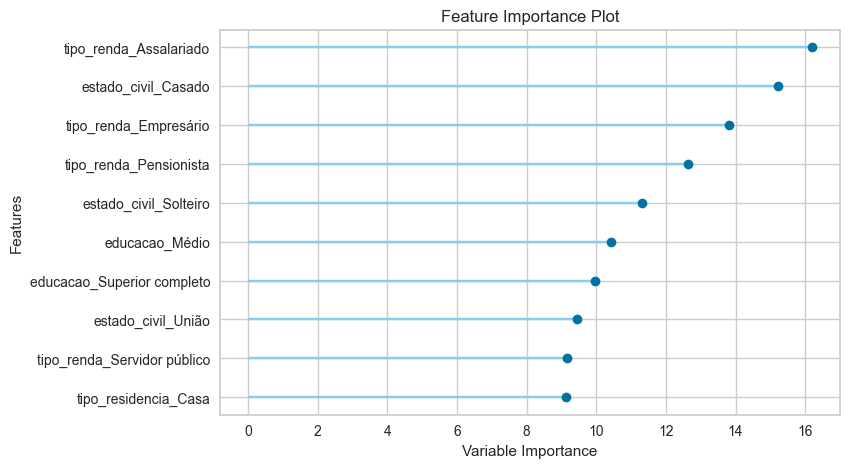

In [82]:
plot_model(model, plot='feature')

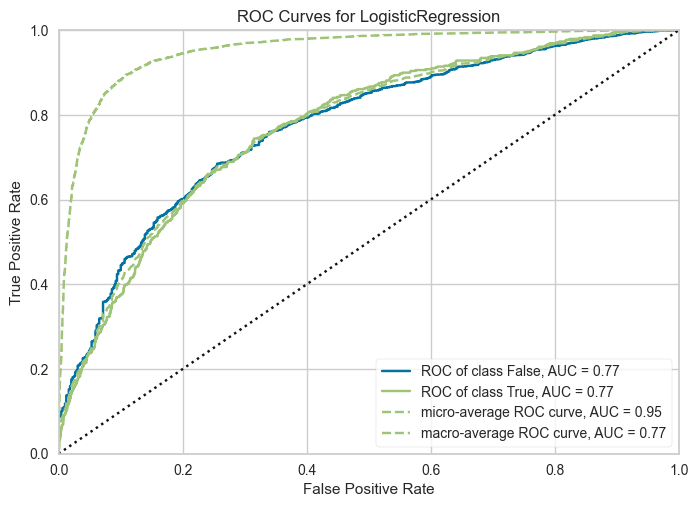

In [84]:
plot_model(model, plot='auc')

In [88]:
clf2 = setup(data=data, target='mau',
            normalize=True,
            transformation=True,
            remove_multicollinearity=True,multicollinearity_threshold=0.85,
            bin_numeric_features=['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia'])

,Description,Value
0,Session id,1371
1,Target,mau
2,Target type,Binary
3,Original data shape,"(20000, 13)"
4,Transformed data shape,"(20000, 29)"
5,Transformed train set shape,"(14000, 29)"
6,Transformed test set shape,"(6000, 29)"
7,Numeric features,5
8,Categorical features,7
9,Rows with missing values,17.0%


In [90]:
clf2.get_config('data')

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
7253,F,N,N,0,Pensionista,Médio,Solteiro,Casa,64,NaN,1.0,7618.729980,False
11902,F,N,S,0,Empresário,Superior completo,Separado,Casa,53,2.657534,1.0,6587.709961,False
19538,M,N,N,0,Assalariado,Médio,Solteiro,Com os pais,28,4.873972,1.0,7735.390137,False
4029,F,S,N,0,Empresário,Médio,Casado,Casa,40,8.846576,2.0,9113.309570,False
3192,M,S,S,0,Empresário,Médio,Casado,Casa,58,4.646575,2.0,3188.229980,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9150,F,N,S,0,Servidor público,Superior completo,Casado,Casa,30,3.175343,2.0,23285.640625,False
5739,F,N,S,0,Pensionista,Médio,Casado,Casa,57,NaN,2.0,13017.540039,True
8958,F,N,S,1,Assalariado,Médio,Separado,Casa,30,5.717808,2.0,9162.519531,False
9765,F,N,N,0,Empresário,Médio,União,Casa,41,3.717808,2.0,1464.420044,True
